In [1]:
from Py_files import full_pipeline
import pandas as pd
import importlib
# importlib.reload(full_pipeline)  # Reload the module

# Now, you can use the class from the reloaded module
from Py_files.full_pipeline import TranscriptPipeline

# Set model path
vision_model_path = r'C:\Users\Declan Bracken\MEng_Project\yolo_training\yolo_v8_models\finetune_v4 (3_classes)\best (1).pt'
LLM_model_path = r"C:\Users\Declan Bracken\MEng_Project\mistral\models\dolphin-2.1-mistral-7b.Q5_K_M.gguf"
# Instantiate pipeline
pipeline = TranscriptPipeline(cnn_path = vision_model_path , LLM_path=LLM_model_path)

c:\miniconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU Acceleration.
Loading Vision Model...
Model loaded successfully.
Creating new instance of MistralInference
Using 3 CPU threads.
Offloading 5 layers to GPU.
-----------------------------------------------------------------------
Loading Mistral to cuda...
-----------------------------------------------------------------------



0: 800x1024 5 grade headerss, 6 grade tables, 5 singe row tables, 44.0ms
Speed: 8.0ms preprocess, 44.0ms inference, 98.0ms postprocess per image at shape (1, 3, 800, 1024)
Image path: \Users\Declan Bracken\Pictures\Saved Pictures\2015-queens-university-transcript-1-2048.webp


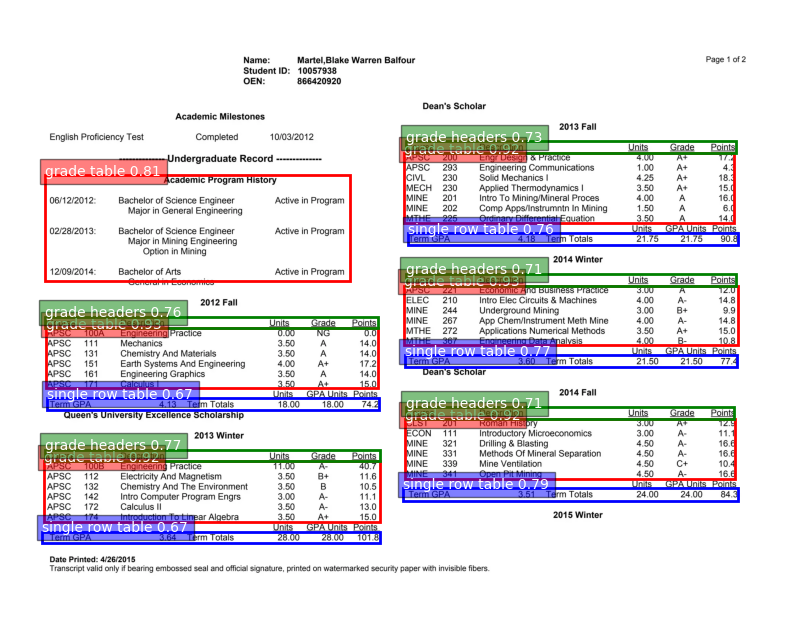

Running OCR Engine: 1it [00:04,  4.16s/it]


Prompting Mistral...
Prompt Successful!


In [2]:
# Set transcript path
transcript_path = r'\Users\Declan Bracken\Pictures\Saved Pictures\2015-queens-university-transcript-1-2048.webp'
table_and_header_dict = pipeline.get_table_strings(transcript_path, plot_bboxes = True,
                                        iou = 0.3, conf = 0.2, agnostic_nms = True)
tables = pipeline.get_dataframes(table_and_header_dict)


In [3]:
first_image_name = next(iter(tables))
# pd.set_option('display.max_rows', 50)
tables[first_image_name]

,: Course Code,Grade,Credits
0,APSC 221,A,3.00
1,ELEC 210,A-,4.00
2,MINE 244,B+,3.00
3,MINE 267,A-,4.00
4,MTHE 272,A+,3.50
5,MTHE 367,B-,4.00
6,APSC 100A,NG,0.00
7,APSC 111,A,3.50
8,APSC 131,A,3.50
9,APSC 151,A+,4.00


In [4]:
print(pipeline.mistral_pipeline.prompt_templates[0])


Below is OCR text from a student transcript. This text contains a table, or multiple tables. Select data only relevant to student courses and grades from these tables and format the fields into a table in csv format. Some extracted table headers are given below to help with formatting. The csv you output should only have 3 columns: 'Course Code', 'Grade', and 'Credits', you must select which columns best fit these fields.
        
### Headers:
Course Description Units Grade _— Points
Course Description Units Grade Points
Course Description Units Grade Points
Course Description Units Grade _— Points
Course Description Units Grade Points

### Text:
APSC 221 Economic And Business Practice 3.00 A 12.0
ELEC 210 Intro Elec Circuits & Machines 4.00 A- 14.8
MINE 244 Underground Mining 3.00 Bt 9.9
MINE 267 App Chem/Instrument Meth Mine 4.00 A- 14.8
MTHE 272 Applications Numerical Methods. 3.50 At 15.0
MTHE 367 Engineering Data Analysis 4.00 B- 10.8
APSC 100A Engineering Practice 0.00 NG 0.0
AP